# Analizing Magnatagatune

In [33]:
import collections
import csv
import operator
import os

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
PATH_DATASET = 'datasets/maganatagatune'
ANNOTATIONS_CSV = os.path.join(PATH_DATASET, 'annotations_final.csv')

genres = {}
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    genres = {genre: 0 for genre in reader.fieldnames[1:-1]}  # 0:clip_id, -1:mp3_path
    for row in reader:
        for tag in genres:
            genres[tag] += int(row[tag])

['guitar', 'classical', 'slow', 'techno', 'strings', 'drums', 'electronic', 'rock', 'fast', 'piano', 'ambient', 'beat', 'violin', 'vocal', 'synth', 'female', 'indian', 'opera', 'male', 'singing', 'vocals', 'no vocals', 'harpsichord', 'loud', 'quiet', 'flute', 'woman', 'male vocal', 'pop', 'no vocal', 'soft', 'sitar', 'solo', 'man', 'classic', 'choir', 'voice', 'new age', 'dance', 'female vocal', 'male voice', 'beats', 'harp', 'cello', 'no voice', 'weird', 'country', 'metal', 'female voice', 'choral']


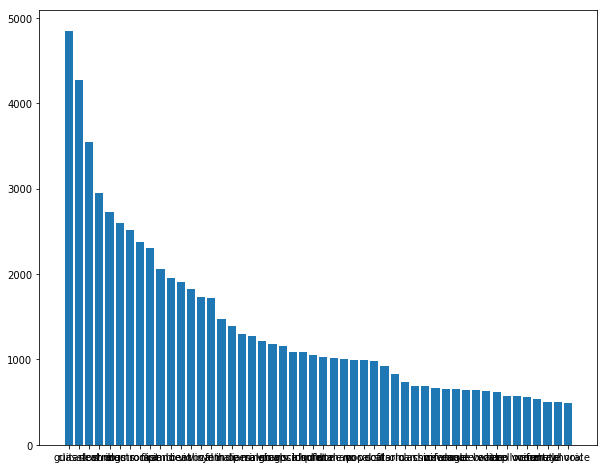

In [108]:
def plot_genre_dict(genres, top=None):
    if top == None:
        top = len(genres.items())
    sorted_genres = list(reversed(sorted(genres.items(), key=operator.itemgetter(1))))
    top_genres = sorted_genres[:top]
    print([t[0] for t in top_genres])
    plt.bar(range(len(top_genres)), [d[1] for d in top_genres], align='center')
    plt.xticks(range(len(top_genres)), [d[0] for d in top_genres])
    plt.show()
    
plot_genre_dict(genres, 50)

**PROBLEM**: not all tags are genres. Let's see them.

In [48]:
for tag in sorted(genres, key=operator.itemgetter(0)):
    print(tag)

ambient
airy
acoustic
acoustic guitar
arabic
bongos
beats
banjo
birds
bass
bells
blues
beat
baroque
clasical
chorus
clarinet
chimes
classical
classic
chanting
choral
classical guitar
country
chant
celtic
cello
calm
clapping
choir
duet
drum
drums
dark
drone
disco
deep
dance
different
eerie
electric
electronic
electric guitar
electro
electronica
echo
eastern
english
female singing
female opera
funky
foreign
female
folk
female voice
funk
fast
fast beat
female vocal
flutes
female vocals
flute
female singer
fiddle
guitar
girl
guitars
hard rock
harpsichord
heavy
horns
happy
harpsicord
horn
heavy metal
hard
harp
house
hip hop
irish
instrumental
industrial
indian
india
jazz
jungle
jazzy
keyboard
loud
lol
low
lute
light
male vocal
men
middle eastern
medieval
male voice
male singer
man singing
male opera
modern
man
mellow
male vocals
male
monks
metal
no voice
no strings
no piano
no voices
no beat
new age
no singing
not classical
no violin
not rock
no guitar
no vocal
no vocals
no flute
no singer


In [139]:
genre_tags = [
    'ambient',
    'arabic',
    'blues',
    'baroque',
    ('classical', 'clasical'),
    ('choir', 'choral'),
    'country',
    'celtic',
    'disco',
    'dance',
    ('funk', 'funky'),
    ('electronica', 'electronic', 'electro'),
    ('female voice', 'female vocal', 'female vocals', 'female singer', 'female singing', 'woman singing'),
    ('male voice', 'male vocal', 'male vocals', 'male singer', 'man singing'),
    'folk',
    'happy',
    'eastern',
    'middle eastern',
    'medieval',
    ('heavy metal', 'heavy', 'metal'),
    'hip hop',
    'industrial',
    ('indian', 'india'),
    'irish',
    ('jazz', 'jazzy'),
    'jungle',
    'new age',
    ('instrumental', 'no voice', 'no voices', 'no singing', 'no vocal', 'no vocals'),
    ('opera', 'male opera', 'female opera', 'operatic'),
    'oriental',
    'pop',
    'punk',
    'reggae',
    'rock',
    'hard rock',
    'soft rock',
    'rap',
    'trance',
    'techno',
    'world',
]

genre_dict = {}
accepted_genres = set()
for genre in genre_tags:
    if isinstance(genre, tuple):
        for genre_i in genre:
            genre_dict[genre_i] = genre[0]
        accepted_genres.add(genre[0])
    else:
        genre_dict[genre] = genre
        accepted_genres.add(genre)

print(len(accepted_genres))
assert len(accepted_genres) == len(genre_tags)

40


In [140]:
genres = {g: 0 for g in accepted_genres}
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    for row in reader:
        for tag, accepted_genre in genre_dict.items():
            genres[accepted_genre] += int(row[tag])

['classical', 'instrumental', 'electronica', 'techno', 'male voice', 'rock', 'ambient', 'female voice', 'opera', 'indian', 'choir', 'pop', 'heavy metal', 'jazz', 'new age', 'dance', 'country', 'eastern', 'baroque', 'funk', 'hard rock', 'trance', 'folk', 'oriental', 'medieval', 'irish', 'blues', 'middle eastern', 'punk', 'celtic', 'arabic', 'rap', 'industrial', 'world', 'hip hop', 'disco', 'soft rock', 'jungle', 'reggae', 'happy']


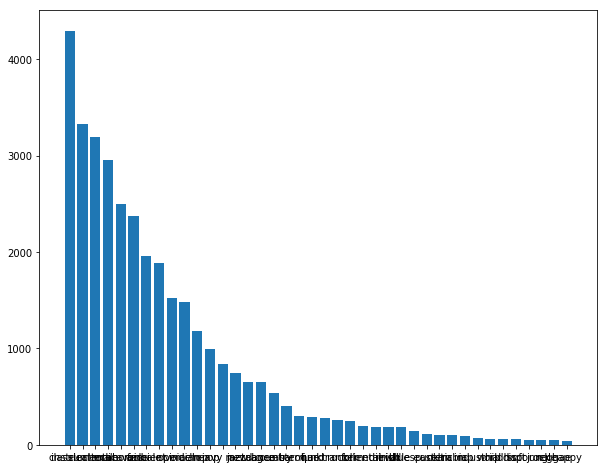

In [141]:
plot_genre_dict(genres)

After grouping the ones I'm interested in, it turns out it's the same ones as before.
The dataset is sadly not balanced, but we'll work with it since it seems to be quite a standard.

In [142]:
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    is_valid = lambda row: any([row[g] == '1' for g in accepted_genres])
    print(len([row for row in reader if is_valid(row)]))

15661
